<a href="https://colab.research.google.com/github/JoshTorre/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
  - Author: Joshua Torre

## Project Overview

**The goal of this project is to...**

## Load and Inspect Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data
fname = '/content/drive/MyDrive/Github/sales_predictions_2023.csv'

# Create dataframe
df = pd.read_csv(fname)

In [4]:
# Copy df for feature inspection
df1 = df.copy()

In [6]:
# Inspect data with df.head()
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [7]:
# Inspect data with df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
# Check number of rows and columns with df.shape
df.shape

(8523, 12)

## Clean Data

In [9]:
# Overview
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Cleaning object columns

In [10]:
# Inspect only object columns
pd.set_option('display.max_rows', None)
df.select_dtypes('object').head(10)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
5,FDP36,Regular,Baking Goods,OUT018,Medium,Tier 3,Supermarket Type2
6,FDO10,Regular,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
7,FDP10,Low Fat,Snack Foods,OUT027,Medium,Tier 3,Supermarket Type3
8,FDH17,Regular,Frozen Foods,OUT045,NaN,Tier 2,Supermarket Type1
9,FDU28,Regular,Frozen Foods,OUT017,NaN,Tier 2,Supermarket Type1


Each object column shall be checked if there are any nulls, duplicates, and inconsistencies in values.

#### Item Identifier

In [11]:
# Inspect if 'Item_Identifier' has any null values
df['Item_Identifier'].isna().sum()

0

In [12]:
# Inspect if 'Item_Identifier' has duplicated values
df['Item_Identifier'].duplicated().value_counts()

True     6964
False    1559
Name: Item_Identifier, dtype: int64

Duplication of Product ID or 'Item_Identifier' will be accepted, since certain products are sold across all outlet stores.

#### Item Fat Content

In [13]:
# Inspect if 'Item_Fat_Content' has any null values
df['Item_Fat_Content'].isna().sum()

0

In [14]:
# Inspect value counts of 'Item_Fat_Content'
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

It seems like there are inconsistencies in the categories of 'Item_Fat_Content'. Based on the Data Dictionary of the dataset, 'Item_Fat_Content' should be categorized either Low Fat or Regular.

In [15]:
# Change 'LF' to 'Low Fat'
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF', 'Low Fat')

In [16]:
# Change 'reg' to 'Regular'
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg', 'Regular')

In [17]:
# Change 'low fat' to 'Low Fat'
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat', 'Low Fat')

In [18]:
# Inspect new value counts of 'Item_Fat_Content'
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Data for 'Item_Fat_Content' is now consistent with having a categorical value of either 'Low Fat' or Regular.

#### Item Type

In [19]:
# Inspect if 'Item_Type' has any null values
df['Item_Type'].isna().sum()

0

In [20]:
# Inspect value counts of 'Item_Type'
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

It seems like values  of 'Item_Type' are properly categorized.

#### Outlet Identifier

In [21]:
# Check value counts of 'Outlet_Identifier'
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [22]:
# Check if 'Outlet_Identifier' has any null values
df['Outlet_Identifier'].isna().sum()

0

It seems like there are not any changes to be made on the column of 'Outlet_Identifier'.

#### Outlet Size: Addressing Null Values

In [23]:
# Check if 'Outlet_Size' has any null values
df['Outlet_Size'].isna().sum()

2410

In [24]:
# Inspect value counts of 'Outlet_Size'
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

The column of 'Outlet_Size' has 2,410 null values. These should be filled with either 'Small', 'Medium', or 'High' categorical value.

In [25]:
# Inspect null values of 'Outlet_Size' sorted by the values of 'Outlet_Identifier'
df.loc[df['Outlet_Size'].isna()].sort_values('Outlet_Identifier')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
2966,FDY60,10.500,Regular,0.044140,Baking Goods,143.9128,OUT010,1998,NaN,Tier 3,Grocery Store,143.8128
2963,FDR27,15.100,Regular,0.160852,Meat,131.3942,OUT010,1998,NaN,Tier 3,Grocery Store,397.4826
1545,FDK52,18.250,Low Fat,0.132596,Frozen Foods,226.2062,OUT010,1998,NaN,Tier 3,Grocery Store,677.1186
1548,NCK18,9.600,Low Fat,0.011211,Household,166.9184,OUT010,1998,NaN,Tier 3,Grocery Store,660.4736
6489,FDX32,15.100,Regular,0.000000,Fruits and Vegetables,146.2786,OUT010,1998,NaN,Tier 3,Grocery Store,433.4358
1555,FDU58,6.610,Regular,0.048560,Snack Foods,188.4898,OUT010,1998,NaN,Tier 3,Grocery Store,187.0898
6469,NCW06,16.200,Low Fat,0.084260,Household,192.3162,OUT010,1998,NaN,Tier 3,Grocery Store,769.6648
2944,DRB48,16.750,Regular,0.041600,Soft Drinks,40.9822,OUT010,1998,NaN,Tier 3,Grocery Store,157.1288
2943,FDU38,10.800,Low Fat,0.138172,Dairy,191.4504,OUT010,1998,NaN,Tier 3,Grocery Store,575.2512


Based on the result above, null values of 'Outlet_Size' are spread out from three different store IDs or 'Outlet_Identifier'. These are 'OUT010', 'OUT017', and 'OUT045'.

Null values:
- OUT010: 555
- OUT017: 926
- OUT045: 929
- Total: 2,410




Observations:
1. 'OUT010' - Built in the year 1998, in a Tier 3 location, and classified as Grocery Store
2. 'OUT017' - Built in the year 2007, in  a Tier 2 location, and classified as Supermarket Type1
3. 'OUT045' - Built in the year 2002, in a Tier 2 location, and classified as Supermarket Type1

Filling in null values will be based on these observations:
1. Year built
2. Location type
3. Outlet type



My strategy would be to filter based on the observations and input a placeholder value that would address the missing values.

In [26]:
# Inspect the value counts of 'Outlet_Establishment_Year'
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

My criteria for making a filter for the year established are outlets built < 2000 and > 2000.

In [27]:
# Inspect the observations on OUT010 based on the year built, outlet location type, and outlet type
df.loc[(df['Outlet_Establishment_Year'] < 2000) & ((df['Outlet_Location_Type'] == 'Tier 3') & (df['Outlet_Type'] == 'Grocery Store'))].head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,Low Fat,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
90,FDW20,20.750,Low Fat,0.040421,Fruits and Vegetables,122.1730,OUT010,1998,NaN,Tier 3,Grocery Store,369.5190
122,FDB14,20.250,Regular,0.171939,Canned,92.5120,OUT010,1998,NaN,Tier 3,Grocery Store,186.4240
133,FDS52,8.890,Low Fat,0.009163,Frozen Foods,101.7016,OUT010,1998,NaN,Tier 3,Grocery Store,101.2016
139,NCN07,18.500,Low Fat,0.056816,Others,132.1284,OUT010,1998,NaN,Tier 3,Grocery Store,263.6568
174,FDI32,17.700,Low Fat,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,NaN,Tier 3,Grocery Store,345.5502


It seems like there are no values from 'Outlet_Size' that can serve as a criterion in choosing a place holder value.

In [28]:
# Inspect the observations on OUT010 based on the year built and outlet type
df.loc[(df['Outlet_Establishment_Year'] < 2000) & (df['Outlet_Type'] == 'Grocery Store')].head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,FDI26,NaN,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720
63,FDY40,NaN,Regular,0.150286,Frozen Foods,51.0692,OUT019,1985,Small,Tier 1,Grocery Store,147.8076
65,FDC46,17.700,Low Fat,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266


Based on the result above, outlets built before 2000 are located in 'Tier 1' or 'Tier 3' locations. Moreover, they are categorized as a 'Grocery Store' and a has 'Small' outlet size. This gives me the idea of potentially using 'Small' as a place holder value.

In [29]:
# What if we place 'Tier 2' as a filter to check if there are Grocery Stores located in this location
df.loc[df['Outlet_Location_Type'] == 'Tier 2'].head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
19,FDU02,13.350,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224
22,NCB30,14.600,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
26,FDV10,7.645,Regular,0.066693,Snack Foods,42.3112,OUT035,2004,Small,Tier 2,Supermarket Type1,1065.2800
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972
53,FDA43,10.895,Low Fat,0.065042,Fruits and Vegetables,196.3794,OUT017,2007,NaN,Tier 2,Supermarket Type1,3121.2704


Outlets built on 'Tier 2' locations are built in the years beyond 2000 and categorized as a 'Supermarket Type1' which does not fit the 'Grocery Store' observation on OUT010.

In [30]:
# Double check if there are outlets located in 'Tier 2' location that is categorized as a 'Grocery Store'
df.loc[(df['Outlet_Location_Type'] == 'Tier 2')& (df['Outlet_Type'] == 'Grocery Store')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


There are no outlets located in 'Tier 2' locations that are cateogrized as a 'Grocery Store'. Therefore, we can assume that outlets built before the year 2000, located in 'Tier 1' or 'Tier 3' locations, and categorized as 'Grocery Store' has 'Small' outlet sizes.

In [31]:
# Create a filter to fill null values based on observations from Store ID: OUT010
store_1 = df['Outlet_Identifier'] == 'OUT010'
null_size = df['Outlet_Size'].isna()

In [32]:
# Fill null values of 'Outlet_Size' based on observations from Store ID: OUT010
df.loc[store_1 & null_size] = df.loc[store_1 & null_size].fillna('Small')

In [33]:
# Inspect if null values are filled with 'Small'
df.loc[store_1 & null_size].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,Small,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,Small,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,Small,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,Low Fat,0.195068,Snack Foods,185.4266,OUT010,1998,Small,Tier 3,Grocery Store,184.4266


In [34]:
# Check number of null values
df['Outlet_Size'].isna().sum()

1855

Null values for the first store ID has been filled. The remaining two store IDs can be solved together, since they have the same observation of built beyond the year 2000, located in 'Tier 2' locations, and categorized as a 'Supermarket Type1'.

In [35]:
# Fill null values of 'Outlet_Size' based on observations from the two remaining store IDs: OUT017 & OUT45
df['Outlet_Size'] = df['Outlet_Size'].fillna('Small')

In [36]:
# Chech if 'Outlet_Size' has any null values left
df['Outlet_Size'].isna().sum()

0

In [37]:
# Check if all object columns have no null values
df.select_dtypes('object').isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

Now, all object columns have been cleaned.

### Cleaning number columns

In [38]:
# Inspect only number columns
df.select_dtypes('number').head(10)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
5,10.395,0.000000,51.4008,2009,556.6088
6,13.650,0.012741,57.6588,1987,343.5528
7,NaN,0.127470,107.7622,1985,4022.7636
8,16.200,0.016687,96.9726,2002,1076.5986
9,19.200,0.094450,187.8214,2007,4710.5350


#### Item Weight

In [39]:
# Inspect null values of 'Item_Weight'
df.loc[df['Item_Weight'].isna()].head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
39,FDB34,NaN,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,FDI26,NaN,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720


The inspection of data shows us that 'Item_Weight' column has null values. These would be filled with a placeholder value based on the computed mean.

In [40]:
# Use df.describe to inspect descriptive statistics of 'Item_Weight
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [41]:
# Calculate the mean of the values in 'Item_Weight'
df['Item_Weight'].mean()

12.857645184135976

In [42]:
# Round off the value to three decimals to match the values in 'Item_Weight'
round(12.857645184135976, 3)

12.858

To fill in the values of 'Item_Weight', I will use the column mean.

In [43]:
# Fill null values with the column mean
df['Item_Weight'] = df['Item_Weight'].fillna(12.858)

In [44]:
# Check if there are null values
df['Item_Weight'].isna().sum()

0

Only the number column of 'Item_Weight' needs to be considered in data cleaning. The other number columns have consistent values. We may now proceed to the next part of the project, which is Exploratory Data Analysis

## Exploratory Data Analysis

In this section of the project, we would explore the different categorical and numerical variables of the data. Through data visualization, we would be able to gain insights and understand more about the data.

To begin the process of data exploration, we would be using heatmaps to quickly identfy variables that have correlations. Once variables are identified, we would look into these one by one.

In [45]:
# Identify numerical columns
df.select_dtypes('number').columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

These are all the numerical columns in the dataframe. We should expect to see all these variables on the heatmap to be created.

In [46]:
# Define corr
corr = df.corr(numeric_only = True)

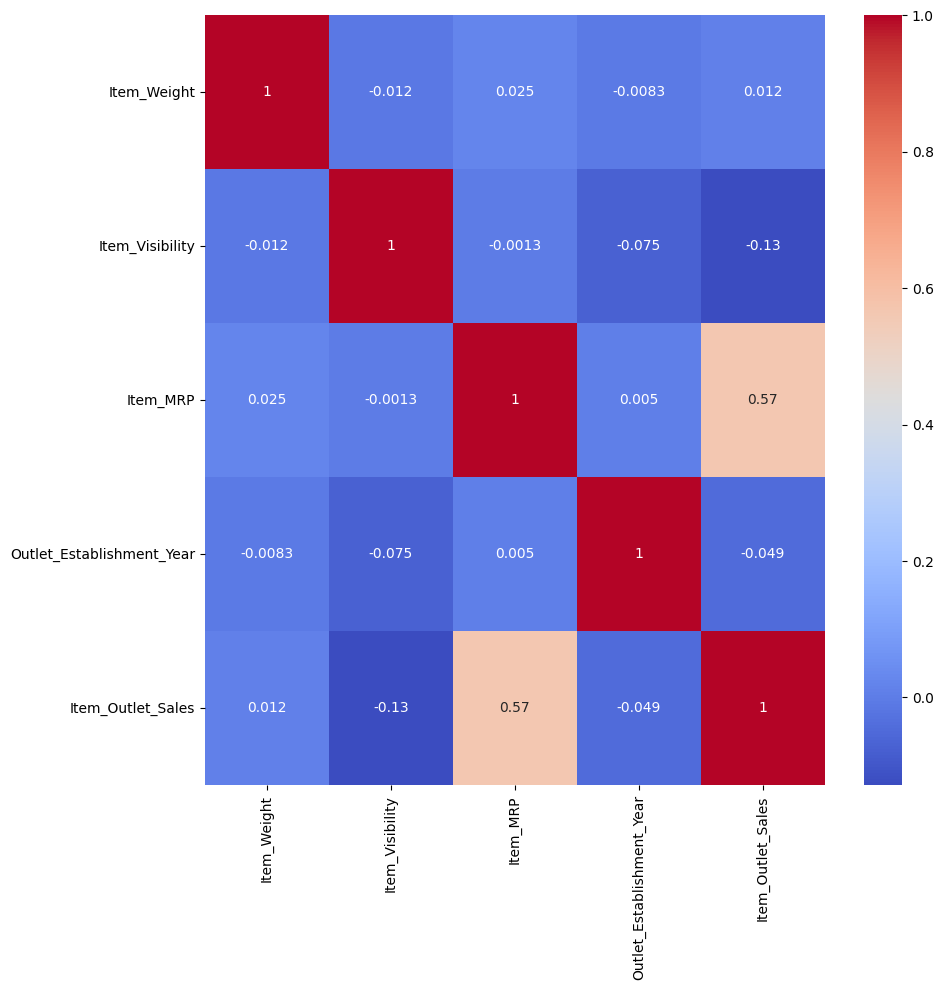

In [47]:
# Create a heatmap
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(corr, cmap = 'coolwarm', annot = True);

Based on the heatmap, 'Item_MRP' and 'Item_Outlet_Sales' have a correlation value of 0.57. This indicates a moderate correlation. Beforem plotting these values together, we would examine the data distribution of each variable.

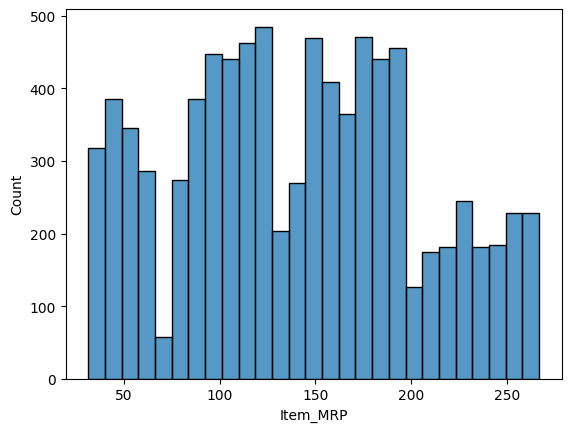

In [48]:
# Create a histogram of 'Item_MRP'
ax = sns.histplot(data = df, x = 'Item_MRP')

Based on the hisogram of 'Item_MRP', products are priced most at around 130 dollars across all retail stores.

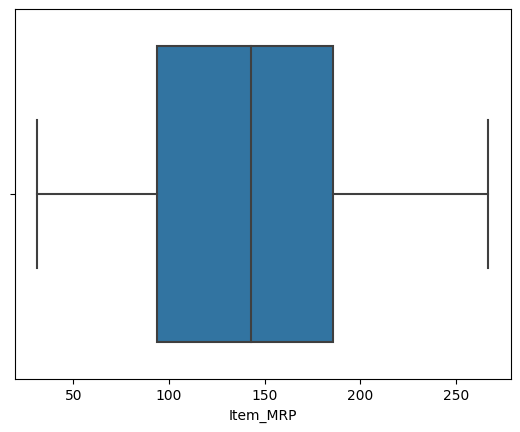

In [49]:
# Create a boxplot of 'Item_MRP'
ax = sns.boxplot(data = df, x = 'Item_MRP')

Based on the boxplot of 'Item_MRP', products are priced at an average of 140 dollars across all retail stores.

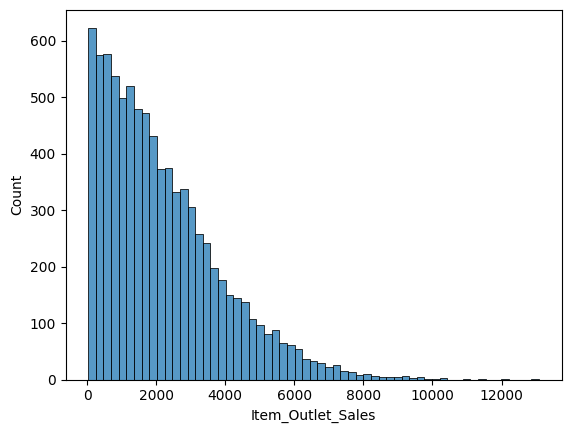

In [50]:
# Create a histogram of 'Item_Outlet_Sales'
ax = sns.histplot(data = df, x = 'Item_Outlet_Sales')

Based on the histogram of 'Item_Outlet_Sales', total count of sales gradually decreases, as data moves along the x-axis. This indicates that only a few stores have generated a high number of sales.

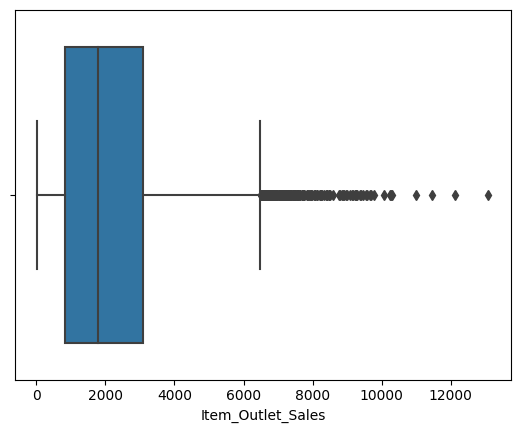

In [51]:
# Create a boxplot of 'Item_Outlet_Sales'
ax = sns.boxplot(data = df, x = 'Item_Outlet_Sales')

Based on the boxplot of 'Item_Outlet_Sales', most stores have generated an average of 2000 dollars. However, there are several outliers, which indicated a high number of sales approximately beyond the 6,500 ticker.

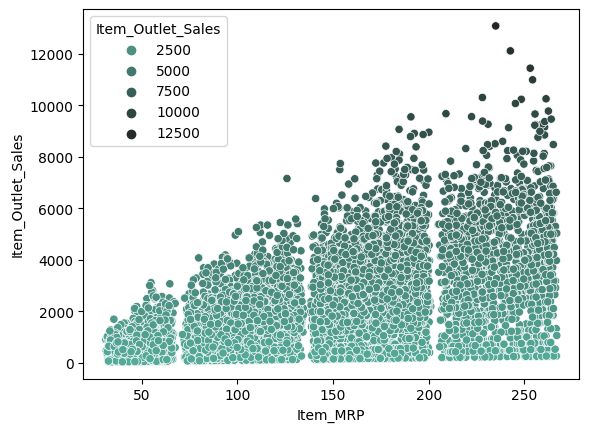

In [52]:
# Create a scatterplot with both 'Item_MRP' and 'Item_Outlet_Sales'
ax = sns.scatterplot(data = df, x = 'Item_MRP', y ='Item_Outlet_Sales', hue = 'Item_Outlet_Sales'
, palette = sns.color_palette("dark:#5A9_r", as_cmap=True))

Based on the scatterplot of 'Item_MRP' and 'Item_Outlet_Sales', it suggests that list price of a product and outlet sales move in a similar direction.

---

The next part of data exploration would be to look into the differrent categorical features of the data.

In [53]:
# Identify object columns
df.select_dtypes('object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [54]:
# Value count of 'Item_Type'
count_item_type = df['Item_Type'].value_counts()

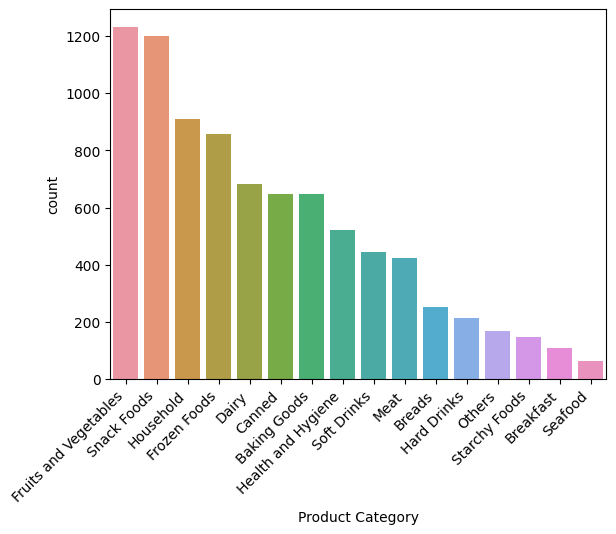

In [55]:
# Create a countplot of 'Item_Type'
ax = sns.countplot(data = df, x = 'Item_Type', order = count_item_type.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right');
ax.set_xlabel('Product Category');

Based on the countplot of 'Item_Type', Fruits and Vegetables is the product category that appeared the most across all outlet stores.

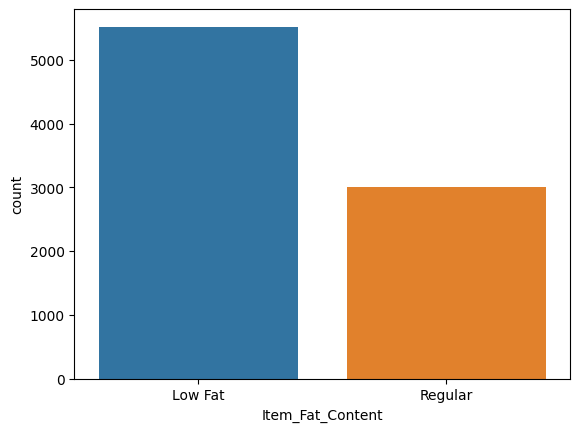

In [56]:
# Create a countplot of 'Item_Fat_Content'
ax = sns.countplot(data = df, x = 'Item_Fat_Content')

Based on the countplot of 'Item_Fat_Content', more product categories sold fall under the Low Fat content rather than the Regular Fat content.

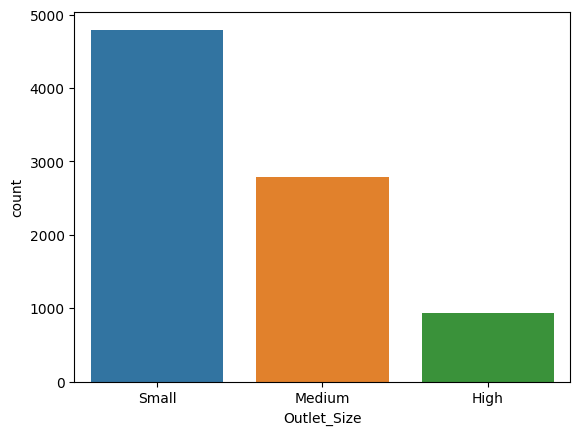

In [57]:
# Create a countplot of 'Outlet_Size'
ax = sns.countplot(data = df, x = 'Outlet_Size', order = df['Outlet_Size'].value_counts().index)

Based on the countplot of 'Outlet_Size', most outlet stores had a 'Small' ground area covered.

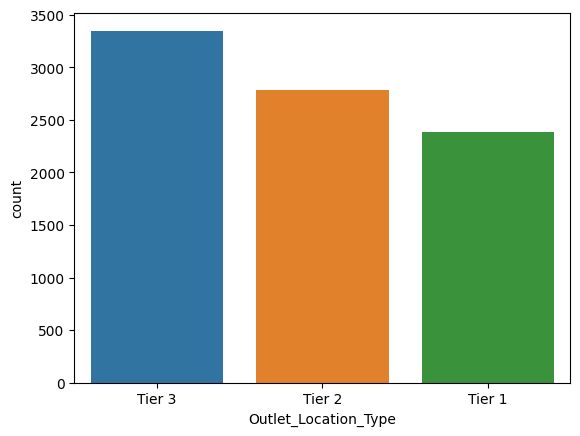

In [58]:
# Create a countplot of 'Outlet_Location_Type'
ax = sns.countplot(data = df, x = 'Outlet_Location_Type', order = df['Outlet_Location_Type'].value_counts().index)

Based on the countplot of 'Outlet_Location_Type', most outlet stores are built on a 'Tier 3' location.

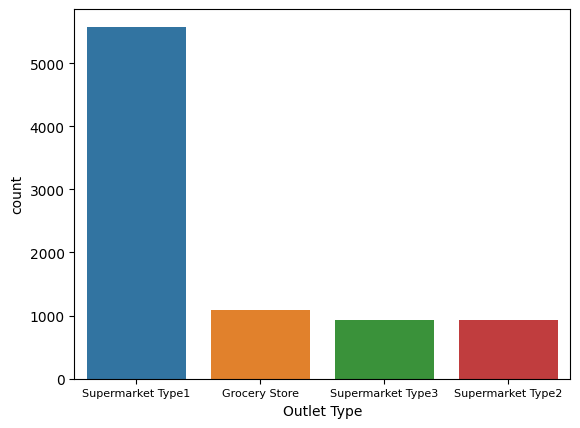

In [59]:
# Create a countplot of 'Outlet_Type'
ax = sns.countplot(data = df, x = 'Outlet_Type', order = df['Outlet_Type'].value_counts().index)
plt.xticks(fontsize = 8)
plt.xlabel('Outlet Type');

Based on the countplot of 'Outlet_Type', most outlet stores are categorizes as a 'Supermarket Type1'

## Feature Inspection

In this section of the project,

The df that will be used in this section
- cleaned
- nulls not addressed

We will be repeating some steps to clean data for column 'Item_Fat_Content'

In [62]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [63]:
# Check value counts
df1['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [65]:
# Change str
df1['Item_Fat_Content'] =  df1['Item_Fat_Content'].str.replace('LF', 'Low Fat')
df1['Item_Fat_Content'] =  df1['Item_Fat_Content'].str.replace('reg', 'Regular')
df1['Item_Fat_Content'] =  df1['Item_Fat_Content'].str.replace('low fat', 'Low Fat')

In [66]:
# Check new value counts
df1['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Now we have cleaned the new dataframe (df1), we can now proceed to feature inspection. We will be using several custom functions to look into the features.

In [73]:
# Load custom functions
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

In [75]:
def explore_numeric(df, x, figsize=(6,5) ):

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [76]:
def plot_categorical_vs_target(df, x, y='charges',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax

In [77]:
def plot_numeric_vs_target(df, x, y='charges',
                           figsize=(6,4)):

  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

start faeture inspection with object columns

In [81]:
df1.select_dtypes('object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

### Item Identifier


Definition from Data Dictionary:
- Product ID

In [82]:
# Confirming the dtype to select correct EDA function
df1['Item_Identifier'].dtype

dtype('O')

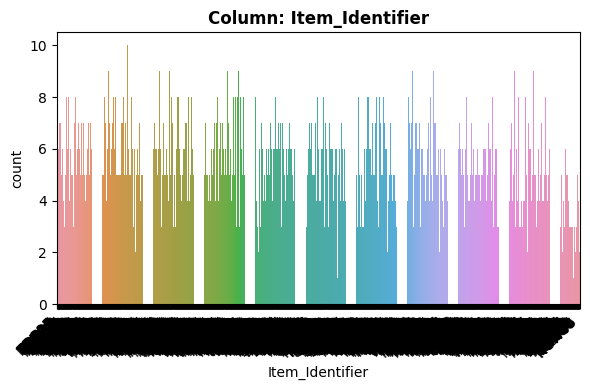

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [84]:
# Use function appropraite based on feature's dtype
explore_categorical(df1, x = 'Item_Identifier');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 1559 unique categories.
  - high cardinality (above threshold of 10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.


### Item Fat Content

Definition from Data Dictionary:
- Whether the product is low-fat or regular

In [85]:
# Confirming the dtype to select correct EDA function
df1['Item_Fat_Content'].dtype

dtype('O')

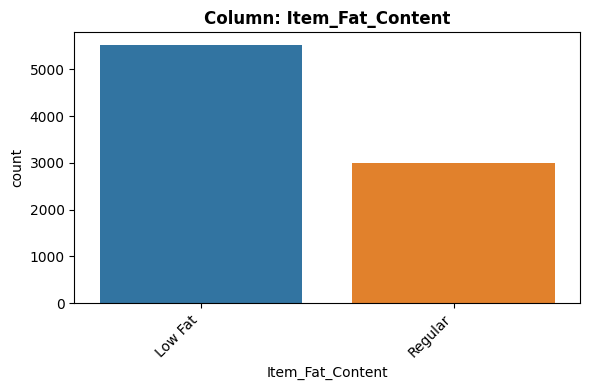

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [86]:
# Use function appropraite based on feature's dtype
explore_categorical(df1, x = 'Item_Fat_Content');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 2 unique categories.
  - low cardinality (below threshold of 10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

### Item Type

Definition from Data Dictionary:
- The category to which the product belongs

In [87]:
# Confirming the dtype to select correct EDA function
df1['Item_Type'].dtype

dtype('O')

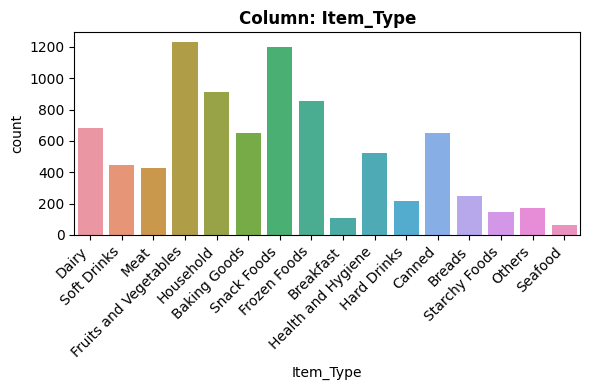

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [88]:
# Use function appropraite based on feature's dtype
explore_categorical(df1, x = 'Item_Type');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 16 unique categories.
  - high cardinality (above threshold of 10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

### Outlet Identifier

Definition from Data Dictionary:
- Store ID

In [89]:
# Confirming the dtype to select correct EDA function
df1['Outlet_Identifier'].dtype

dtype('O')

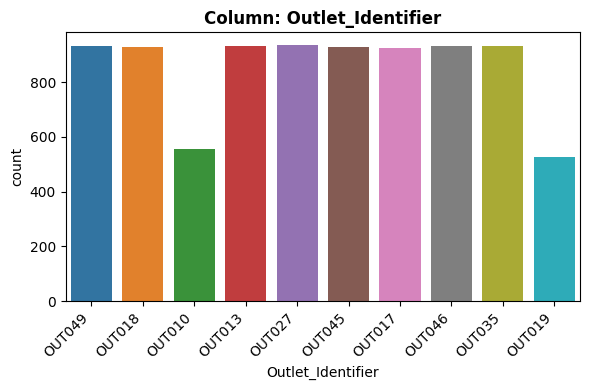

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [90]:
# Use function appropraite based on feature's dtype
explore_categorical(df1, x = 'Outlet_Identifier');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 10 unique categories.
  - high cardinality (reached threshold of 10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

### Outlet Size

Definition from Data Dictionary:
- The size of the store in terms of ground area covered

In [91]:
# Confirming the dtype to select correct EDA function
df1['Outlet_Size'].dtype

dtype('O')

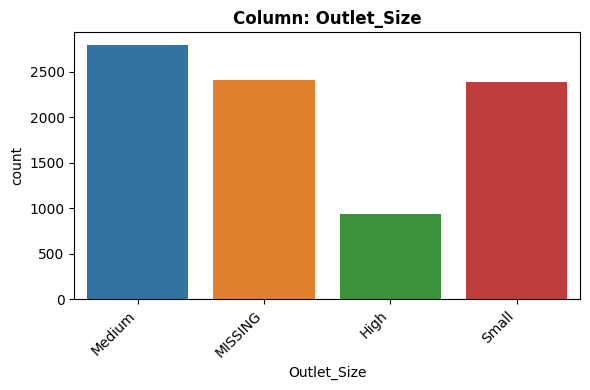

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [92]:
# Use function appropraite based on feature's dtype
explore_categorical(df1, x = 'Outlet_Size');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (ordinal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 null values
  - impute with 'MISSING'

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 unique categories.
  - low cardinality (below threshold of 10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

### Outlet Location Type

Definition from Data Dictionary:
- The type of area in which the store is located

In [93]:
# Confirming the dtype to select correct EDA function
df1['Outlet_Location_Type'].dtype

dtype('O')

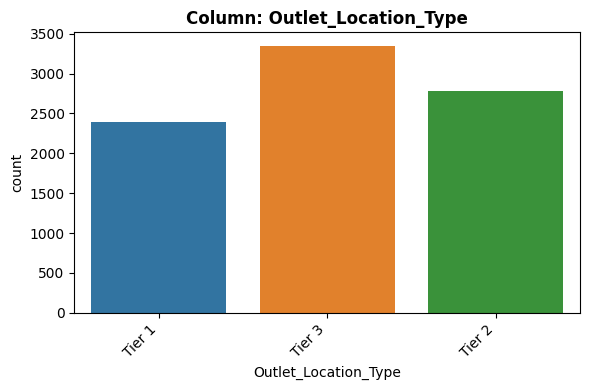

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [94]:
# Use function appropraite based on feature's dtype
explore_categorical(df1, x = 'Outlet_Location_Type');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 3 unique categories.
  - low cardinality (below threshold of 10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

### Outlet Type

Definition from Data Dictionary:
- Whether the outlet is a grocery store or some sort of supermarket

In [95]:
# Confirming the dtype to select correct EDA function
df1['Outlet_Type'].dtype

dtype('O')

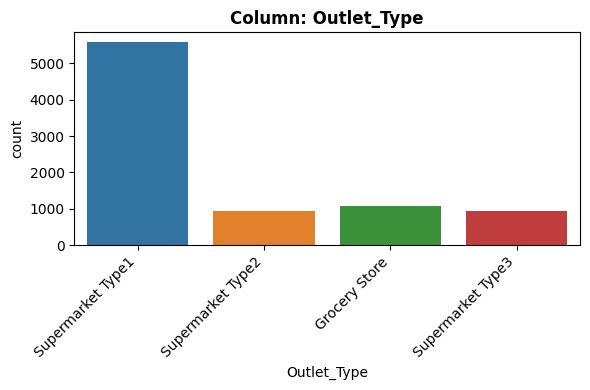

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [96]:
# Use function appropraite based on feature's dtype
explore_categorical(df1, x = 'Outlet_Type');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 unique categories.
  - low cardinality (below threshold of 10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

We have finished the feature inspection for object columns. Now, we proceed to the feature inspection of number columns.

In [97]:
df1.select_dtypes('number').columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

### Item Weight

Definition from Data Dictionary:
- Weight of product

In [98]:
# Confirming the dtype to select correct EDA function
df1['Item_Weight'].dtype

dtype('float64')

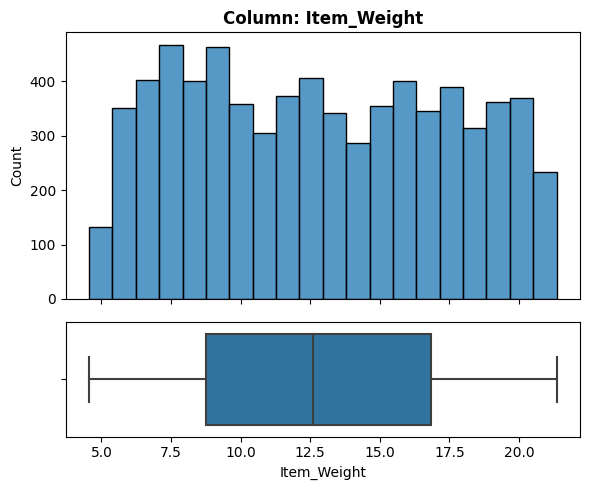

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [99]:
# Use function appropraite based on feature's dtype
explore_numeric(df1, x = 'Item_Weight');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 null values

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 415 unique values.
  - high cardinality (below threshold of 10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

### Item Visibility - DOUBLE CHECK

Definition from Data Dictionary:
- The percentage of total display area of all products in a store allocated to the particular product

In [100]:
# Confirming the dtype to select correct EDA function
df1['Item_Visibility'].dtype

dtype('float64')

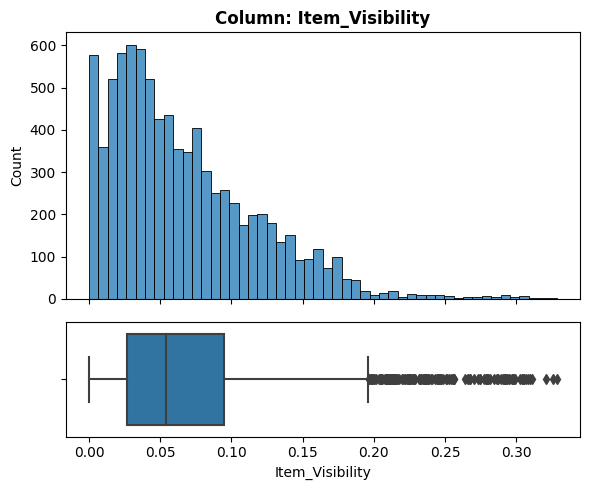

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [101]:
# Use function appropraite based on feature's dtype
explore_numeric(df1, x = 'Item_Visibility');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 7880 unique values.
  - high cardinality (above threshold of 10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

### Item MRP

Definition from Data Dictionary:
- Maximum Retail Price (list price) of the product

In [109]:
# Confirming the dtype to select correct EDA function
df1['Item_MRP'].dtype

dtype('float64')

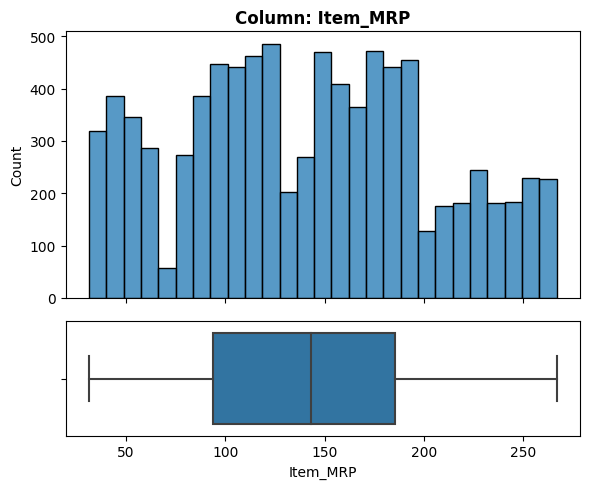

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [110]:
# Use function appropraite based on feature's dtype
explore_numeric(df1, x = 'Item_MRP');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 5938 unique values.
  - high cardinality (above threshold of 10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

### Outlet Establishment Year

Definition from Data Dictionary:
- The year in which store was established

In [111]:
# Confirming the dtype to select correct EDA function
df1['Outlet_Establishment_Year'].dtype

dtype('int64')

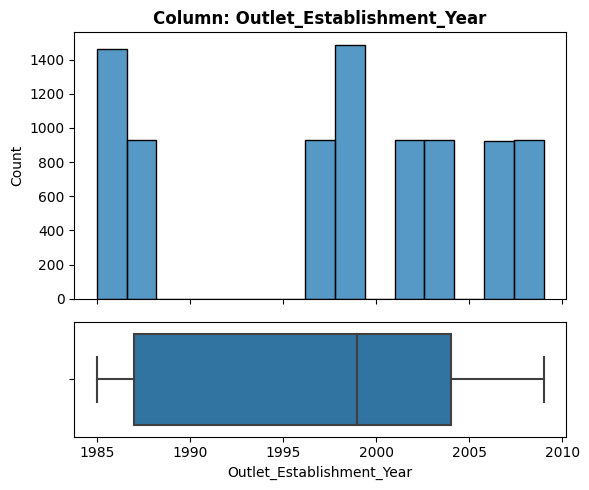

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [112]:
# Use function appropraite based on feature's dtype
explore_numeric(df1, x = 'Outlet_Establishment_Year');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 9 unique values.
  - low cardinality (below threshold of 10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

### Item Outlet Sales

Definition from Data Dictionary:
- Sales of the product in the particular store. This is the target variable to be predicted

In [115]:
# Confirming the dtype to select correct EDA function
df1['Item_Outlet_Sales'].dtype

dtype('float64')

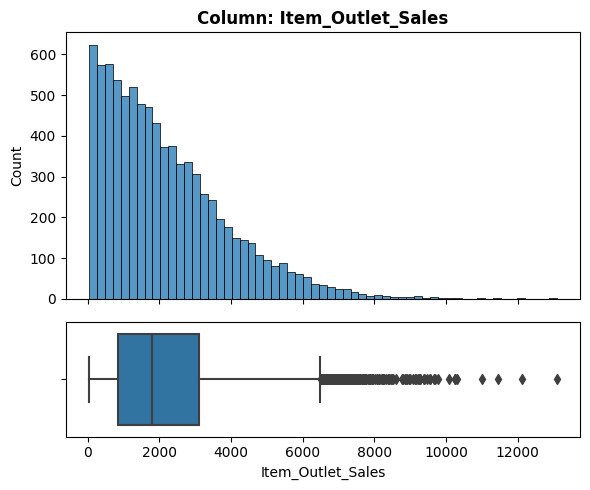

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [116]:
# Use function appropraite based on feature's dtype
explore_numeric(df1, x = 'Item_Outlet_Sales');

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 3493 unique values.
  - high cardinality (above threshold of 10)

5. Would we know this BEFORE the target is determined?
  - No.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.